<a href="https://colab.research.google.com/github/OleksandrDoskalchuk/hello-world/blob/main/Task_%E2%84%968(Apriori%2C_Clustering%2C_PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style("darkgrid")

In [6]:
path = "/content/drive/MyDrive/main academy/датасеты/Groceries_dataset.csv"
df = pd.read_csv(path)
df.head(3)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit


# 1.Зробіть описову статистику даного файлу

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [8]:
df["itemDescription"].nunique() # кількість унікальних одиниць товару

167

In [9]:
df["Member_number"].nunique() # кількість продавців

3898

In [10]:
df["Date"].min()

'01-01-2014'

In [11]:
df["Date"].max()

'31-10-2015'

Вибірка містить дані за період з 01-01-2014 по 31-10-2015

# 2.Виведіть топ-3 продукти, що продаються

In [12]:
df.value_counts("itemDescription")[0:3]

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
dtype: int64

# 3.Виведіть топ-2 пари продуктів, що продаються

Застосуєм функцію apriori з бібліотеки ассоціативних правил.

In [13]:
! pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=037eadaf345988f525f3af46584a13432819d573004a23c182cec855b12a052a
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [14]:
from apyori import apriori

In [15]:
df.head(3)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit


In [16]:
group_df = df.groupby(['Date','Member_number'])['itemDescription'].apply(list)

Групуєм дані по даті і номеру клієнта, щоб бачити всю покупку за кожен день у кожного клієнат

In [17]:
transactions = group_df.tolist()

формуєм список з списками покупок

In [18]:
for list_ in transactions:
  if len(list_) != 2:
    transactions.remove(list_)


залишаєм лише ті покупки, де було придбано 2 товари

In [19]:
print(transactions)

[['citrus fruit', 'coffee'], ['curd', 'soda'], ['other vegetables', 'yogurt'], ['specialty chocolate', 'frozen vegetables'], ['hamburger meat', 'candles'], ['tropical fruit', 'other vegetables'], ['sausage', 'bottled water'], ['bottled water', 'Instant food products'], ['cleaner', 'shopping bags'], ['sliced cheese', 'bottled water'], ['yogurt', 'frozen vegetables'], ['hamburger meat', 'frozen potato products'], ['whole milk', 'flower (seeds)'], ['onions', 'whipped/sour cream', 'dishes'], ['waffles', 'whole milk'], ['yogurt', 'shopping bags', 'waffles', 'chocolate'], ['soda', 'brown bread'], ['butter', 'frozen vegetables'], ['sausage', 'sausage', 'bottled beer', 'spread cheese'], ['beef', 'pastry', 'curd'], ['pork', 'pickled vegetables'], ['butter', 'pastry'], ['frozen meals', 'other vegetables'], ['whole milk', 'white bread', 'canned beer', 'brown bread', 'fruit/vegetable juice'], ['citrus fruit', 'whole milk'], ['dessert', 'soda'], ['butter', 'tropical fruit'], ['ham', 'brown bread'],

In [20]:
len(transactions)

11324

вийшло 11324 замовлення

In [21]:
rules = apriori(transactions=transactions,
                min_support=10/len(transactions),
                min_confidence=0.05,
                min_lift=0.1,
                max_length=2)

Застосували функцію apriori до оброблених даних

In [22]:
results = list(rules)

Додали результати в список

In [23]:
results = [result for result in results if len(result[0])>1]

Лишили в списку результати, тільки з двома товарами

In [24]:
def inspect(results):
    lhs         = [tuple(result[0])[0] for result in results]
    rhs         = [tuple(result[0])[1] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

Через створену функцію inspect створили 5 списків з результатами та з них утворили датафрейм з колонками: 'Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'.

In [25]:
sorted_by_support = resultsinDataFrame.sort_values("Support", ascending=False)
sorted_by_support.head(2)

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
176,whole milk,other vegetables,0.010685,0.094457,0.675275
201,whole milk,rolls/buns,0.008831,0.092593,0.661944


Відсортували датафрейм по support(як часто правило зустрічається в транзакціях)


In [ ]:
df.groupby(['Date','Member_number'])['itemDescription'].sum().value_counts()[:3] #кількіть покупок топ-пар покупок

other vegetableswhole milk    48
whole milkwhole milk          40
whole milkrolls/buns          38
Name: itemDescription, dtype: int64

Кількіть покупок для топ-пар придбаних товарів

# **Завдання 2:**
# Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

# Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
Опишіть отримані результати

In [ ]:
path = "/content/drive/MyDrive/main academy/датасеты/Mall_Customers.csv"
df = pd.read_csv(path)
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
df = df.drop('CustomerID', axis=1)
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [ ]:
df = pd.get_dummies(df, columns=["Gender"])
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
X = StandardScaler().fit_transform(df)

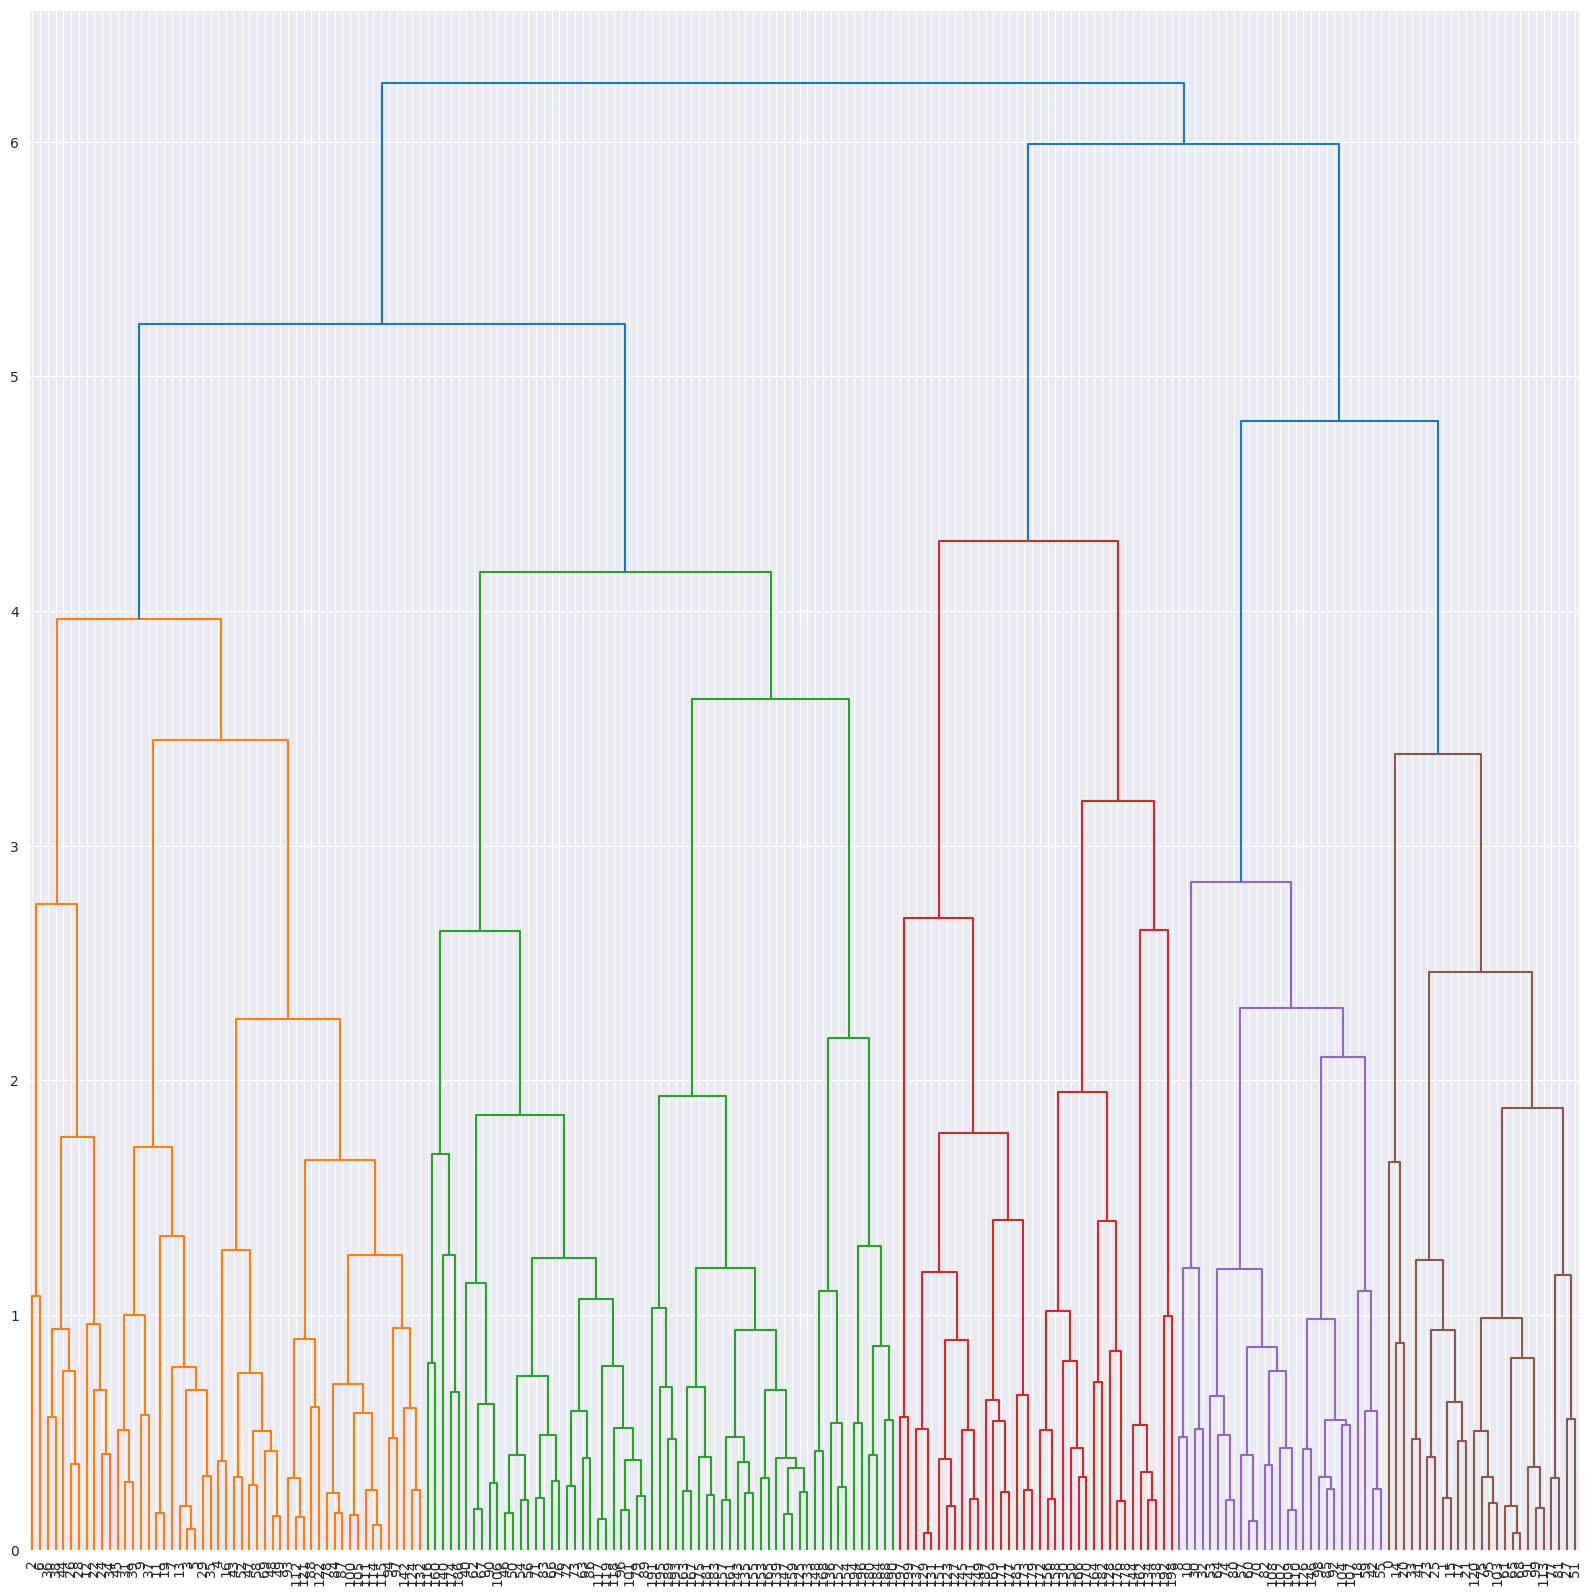

In [ ]:
merging = linkage(X, method='complete')

dendrogram(merging, labels=df.index, leaf_font_size=10)

fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()

Вивів дендограму,щоб подивитись наявність явного розбиттся на класи, поки що рішення про остаточну кількість кластерів не прияйнято, побачим що нам покаже графік з застосуванням 'правила локтя'.На даній дендограмі я б виділив 2, 4 кластера.

**Розбиття даних на кластери за допомогою методу KMeans.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

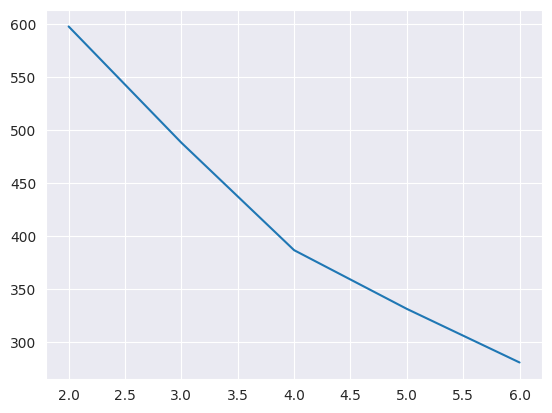

In [ ]:
crit = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=15)
    kmeans.fit(X)
    crit.append(kmeans.inertia_)

plt.plot(range(2,7), crit)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
predicted_labels = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Застосував 'правило локтя' для визначення кількості кластерів - видно, що на кількості 4 лінія змінює кут спадання.Отже, розбиття буде на 4 кластера.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
Q = pca.transform(X)



Зменшення розмірності за допомогою методу PCA.Для двовимірної візуалізації зменшу ознаки до 2 компонентів

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.405211  , 0.66710328])

Вивів накопичувану відносну дисперсію, пояснювану кожною компонентою

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.columns[:])
loading_matrix

,PC1,PC2
Age,0.169176,0.797117
Annual Income (k$),0.105464,-0.104446
Spending Score (1-100),-0.165325,-0.797824
Gender_Female,-0.992260,0.128866
Gender_Male,0.992260,-0.128866


Вивів "Навантаження" для кожної ознаки у кожній компоненті PCA.Можна зробити такий висновок:
*   компонент PC1 відповідає за стать:
  *  додатні значення - чоловіки;
  *  від'ємні значення - жінки;
*   PC2 відповідає за вік та оцінку витрат:
  * чим більше значення PC2  - тим менша оцінка витрат
  * чим більше значення PC2 - тим більше вік.

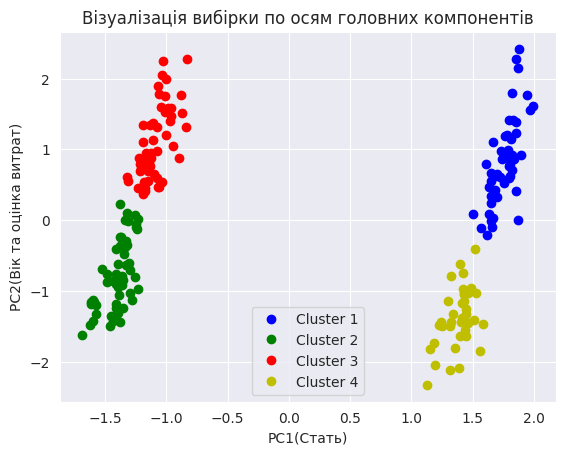

In [ ]:
plt.plot(Q[predicted_labels == 0, 0], Q[predicted_labels == 0, 1], 'bo', label='Cluster 1')
plt.plot(Q[predicted_labels == 1, 0], Q[predicted_labels == 1, 1], 'go', label='Cluster 2')
plt.plot(Q[predicted_labels == 2, 0], Q[predicted_labels == 2, 1], 'ro', label='Cluster 3')
plt.plot(Q[predicted_labels == 3, 0], Q[predicted_labels == 3, 1], 'yo', label='Cluster 4')
plt.xlabel('PC1(Стать)')
plt.ylabel('PC2(Вік та оцінка витрат)')
plt.title('Візуалізація вибірки по осям головних компонентів')
plt.legend(loc=0);
plt.show()


1.   Cluster 1 - Чоловіки з меншою оцінкою витрат.(синій колір)
1.   Cluster 2 - Жінки з вищою оцінкою витрат.(зелений колір)
3.   Cluster 3 - Жінки з вищою оцінкою витрат.(червоний колір)
4.   Cluster 4 - Чоловіки з вищою оцінкою витрат.(жовтий колір)


In [ ]:
df['cluster'] = kmeans.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,19,15,39,0,1,3
1,21,15,81,0,1,3
2,20,16,6,1,0,2
3,23,16,77,1,0,1
4,31,17,40,1,0,1


Провів кластеризацію для датасету з клієнтами супермаркету.Визначив за якими основними ознаками поділено клієнтів на кластери.
1.   Cluster 1 - Чоловіки з меншою оцінкою витрат.(синій колір)
1.   Cluster 2 - Жінки з вищою оцінкою витрат.(зелений колір)
3.   Cluster 3 - Жінки з вищою оцінкою витрат.(червоний колір)
4.   Cluster 4 - Чоловіки з вищою оцінкою витрат.(жовтий колір)